In [1]:
import pandas as pd

In [2]:
winequality_red_df = pd.read_csv("winequality-data/winequality-red.csv", delimiter=";", index_col=False)
winequality_white_df = pd.read_csv("winequality-data/winequality-white.csv", delimiter=";", index_col=False)

# add identifier for white/red wine
winequality_red_df['color'] = 1
winequality_white_df['color'] = 0

# concat dataframes
wine_quality_df = pd.concat([winequality_white_df, winequality_red_df],axis=0).set_index(['color'])

Classification task: predict ‘color‘ from the other features, including
‘quality‘.

In [3]:

abalone_headers = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',  'Rings']  
abalone_df = pd.read_csv("abalone-data/abalone.csv", names=abalone_headers, index_col=['Rings'])

Classification task: predict ‘Rings‘ from the other features, this feature
is essentially the age of the fish. Note that one of the features is categorical

# Assesment of Data and Applying Normalization

## 1.1 Is there any missing data?

In [4]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [5]:
len(abalone_df)

4177

In [6]:
wine_quality_df.reset_index().describe()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,0.430779,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
len(wine_quality_df)

6497

Since the full the `describe` function for both dataframes shows that the total length of the dataframes matches with the `count` of non-null/non-NA observations we can conclude there is no missing data in wine quality and abalone data sets.

## 1.2 Compute the moments or summarization statistics on the data features (mean, median, variance, skew, kurtosis). Do these highlight anything interesting about the different features? 


In [8]:
abalone_df.reset_index().describe()

,Rings,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,9.933684,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,3.224169,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,8.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,9.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,11.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,29.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


array([[<AxesSubplot:title={'center':'Rings'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>, <AxesSubplot:>]],
      dtype=object)

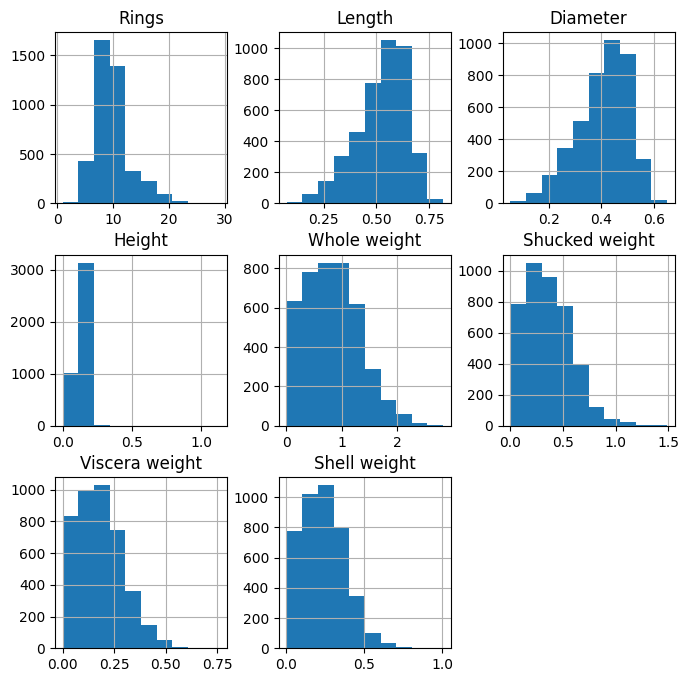

In [11]:
abalone_df.reset_index().hist(figsize=(8,8))

array([[<AxesSubplot:title={'center':'color'}>,
        <AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>],
       [<AxesSubplot:title={'center':'quality'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

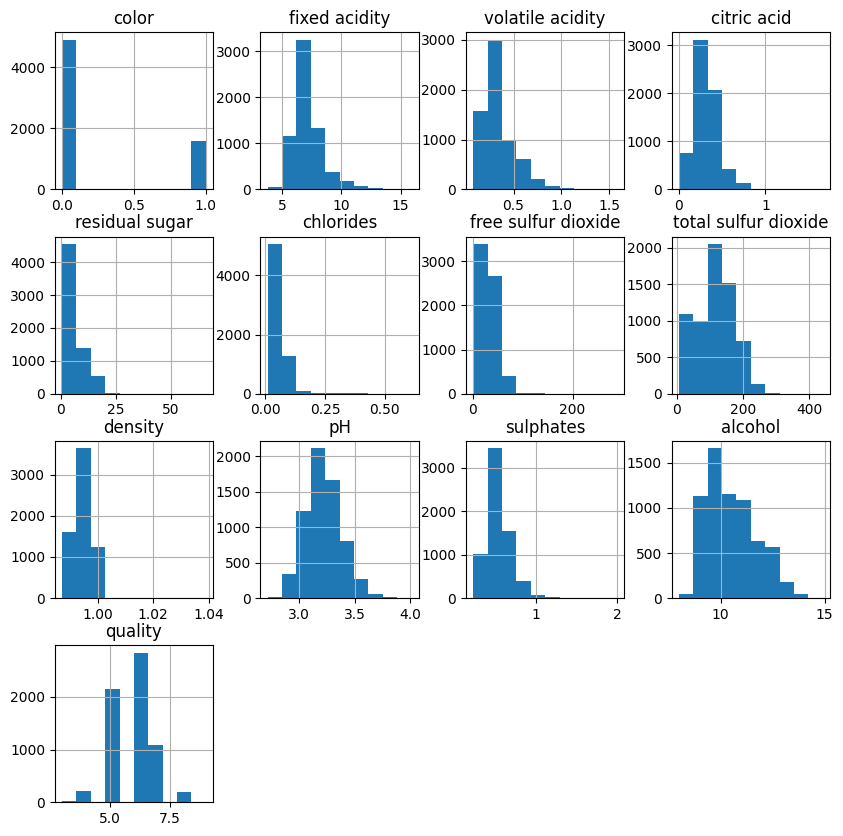

In [13]:
wine_quality_df.reset_index().hist(figsize=(10,10))

In [30]:
wine_quality_skew = wine_quality_df.reset_index().skew(axis=0, numeric_only=True)
wine_quality_kurtosis = wine_quality_df.reset_index().kurtosis(axis=0, numeric_only=True)
wine_quality_mean = wine_quality_df.reset_index().mean(axis=0, numeric_only=True)
wine_quality_var = wine_quality_df.reset_index().var(axis=0, numeric_only=True)
wine_quality_median = wine_quality_df.reset_index().median(axis=0, numeric_only=True)

wine_quality_skew.name = 'skew'
wine_quality_kurtosis.name = 'kurtosis'
wine_quality_mean.name = 'mean'
wine_quality_var.name = 'variance'
wine_quality_median.name = 'median'

wine_quality_statistics = pd.concat([wine_quality_mean, wine_quality_median, wine_quality_var, wine_quality_skew, wine_quality_kurtosis ], axis=1)
wine_quality_statistics

,mean,median,variance,skew,kurtosis
color,0.246114,0.00000,0.185570,1.179095,-0.609922
fixed acidity,7.215307,7.00000,1.680740,1.723290,5.061161
volatile acidity,0.339666,0.29000,0.027105,1.495097,2.825372
citric acid,0.318633,0.31000,0.021117,0.471731,2.397239
residual sugar,5.443235,3.00000,22.636696,1.435404,4.359272
chlorides,0.056034,0.04700,0.001227,5.399828,50.898051
free sulfur dioxide,30.525319,29.00000,315.041192,1.220066,7.906238
total sulfur dioxide,115.744574,118.00000,3194.720039,-0.001177,-0.371664
density,0.994697,0.99489,0.000009,0.503602,6.606067
pH,3.218501,3.21000,0.025853,0.386839,0.367657


In [31]:
abalone_skew = abalone_df.reset_index().skew(axis=0, numeric_only=True)
abalone_kurtosis = abalone_df.reset_index().kurtosis(axis=0, numeric_only=True)
abalone_mean = abalone_df.reset_index().mean(axis=0, numeric_only=True)
abalone_var = abalone_df.reset_index().var(axis=0, numeric_only=True)
abalone_median = abalone_df.reset_index().median(axis=0, numeric_only=True)

abalone_skew.name = 'skew'
abalone_kurtosis.name = 'kurtosis'
abalone_mean.name = 'mean'
abalone_var.name = 'variance'
abalone_median.name = 'median'

abalone_statistics = pd.concat([abalone_mean, abalone_median, abalone_var, abalone_skew, abalone_kurtosis ], axis=1)
abalone_statistics

,mean,median,variance,skew,kurtosis
Rings,9.933684,9.0000,10.395266,1.114102,2.330687
Length,0.523992,0.5450,0.014422,-0.639873,0.064621
Diameter,0.407881,0.4250,0.009849,-0.609198,-0.045476
Height,0.139516,0.1400,0.001750,3.128817,76.025509
Whole weight,0.828742,0.7995,0.240481,0.530959,-0.023644
Shucked weight,0.359367,0.3360,0.049268,0.719098,0.595124
Viscera weight,0.180594,0.1710,0.012015,0.591852,0.084012
Shell weight,0.238831,0.2340,0.019377,0.620927,0.531926


Some skew exists although it is minimal from looking at the histogram of the two data sets. Furthermore, the means and medians for the features are pretty close to each other implying the data is close to being symmetrical. 